
# Analyses univariées et bivariées - Tests statistiques

*OPENCLASSROOMS - Parcours Data Analyst V2 - Adeline Le Ray*
<hr>

## Sommaire

* [1. Les tests stastistiques](#1)
    * [1.1 Définition](#1_1)
    * [1.2 Les étapes du test statistique](#1_2)

* [2. Statistiques : analyse univariée](#2)
    * [2.1 Distribution empirique](#2_1)
    * [2.2 Mesures de tendance centrale](#2_2)
    * [2.3 Mesures de dispersion](#2_3)
    * [2.4 Mesures de forme](#2_4)
    * [2.5 Mesures de concentration](#2_5)
 
 
* [3. Statistiques : analyse bivariée](#3)
    * [3.1. Tests de normalité](#3_1)
        
    * [3.2 Analyse bivariée entre 2 variables quantitatives](#3_2)
        * [3.2.1 Représentation graphique : Discrétisation et boxplots](#3_2_1)
        * [3.2.2 Coefficient de corrélation linéaire de Pearson (test paramétrique)](#3_2_2)
        * [3.2.3 Coefficient de rang de Spearman (Spearman's rho) (test non paramétrique)](#3_2_3)
        * [3.2.4 Matrice de corrélation - heatmap](#3_2_4)
                
    * [3.3. Analyse bivariée entre une variable quantitative et une variable qualitative](#3_3)
        * [3.3.1 Représentation graphique](#3_3_1)
        * [3.3.2 Test d'égalité des variances](#3_3_2)
        * [3.3.3 Méthode ANOVA : analyse de la variance (test paramétrique)](#3_3_3)
            * [3.3.3.1 Classic ANOVA](#3_3_3_1)
            * [3.3.3.2 Welch-ANOVA (test paramétrique)](#3_3_3_2)
        * [3.3.4  Tests non paramétriques](#3_3_4)
            * [3.3.4.1 Méthode Kruskal-wallis H test](#3_3_4_1)
             
    * [3.4 Analyse bivariée entre variables qualitatives](#3_4)
        * [3.4.1 Tableau des contingence](#3_4_1)
        * [3.4.2 Heatmap des écarts au carré normalisés](#3_4_2)
        * [3.4.3 Test du $\chi^2$ d'indépendance (chi-2 ou khi-2)](#3_4_3)
        * [3.4.4 Test du V de Cramer](#3_4_4)



# 1. Les tests statistiques<a class="anchor" id="1"></a>

## 1.1. Définitions<a class="anchor" id="1_1"></a>
Source : [https://fr.wikipedia.org/wiki/Test_statistique](https://fr.wikipedia.org/wiki/Test_statistique)

### Le risque de première espèce α
Le risque de première espèce α est la probabilité sous H0 de la région de rejet. En d'autres termes, il s'agit de la probabilité que l'on accepte de décider H1 si la vérité est H0.

La quantité 1 – α est la confiance du test. En d'autres termes, une proportion α des situations dans lesquelles la vérité est H0 verront une décision du test en faveur de H1. α est la probabilité avec laquelle on accepte de se tromper quand la vérité est H0.

On peut comparer la valeur p à α plutôt que Sobs et la région de rejet.

Si la valeur p est supérieure à α, il n'est pas exceptionnel sous H0 d'observer la valeur effectivement observée. Par conséquent, H0 n'est pas rejetée.
Si la valeur p est inférieure à α, la valeur observée est jugée exceptionnelle sous H0. On décide alors de rejeter H0 et de valider H1.
Cette méthode possède l'avantage de permettre de se rendre compte à quel point la décision du test est sûre : la position de la valeur p par rapport à α ne dépend pas de l'échelle des données, contrairement à Sobs et au(x) seuil(s) de la région de rejet.

Les valeurs du risque α couramment utilisées varient généralement entre 0,01 et 0,05. Dans le cas de variables continues, on peut choisir une valeur arbitraire de α et obtenir une région de rejet présentant exactement le risque α. Dans le cas de variables discrètes, le nombre de région de rejet, et donc de risques possibles, est fini et dénombrable. Dans ce cas, on fixe un risque, dit risque nominal par exemple de 5 %. On cherche alors la plus grande région ne dépassant pas ce risque, qui devient alors la région de rejet. Le véritable risque, dit risque réel peut alors être recalculé.

### Le risque de deuxième espèce β
Le risque de deuxième espèce β est la probabilité de ne pas rejeter H0 alors que la vérité est H1. Il s'agit d'un risque qui n'est pas fixé a priori par le test, et il est souvent difficile à estimer. On prend ce risque lorsqu'on accepte l'hypothèse H0.

La quantité 1 – β est la puissance du test

### Choix de α et β
Pour se représenter ces différentes notions, on peut les représenter au travers du tableau suivant :
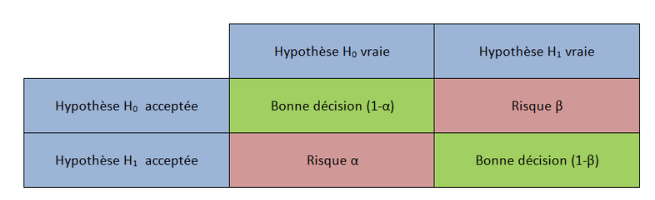

Le choix de α et de β se fait de façon assez arbitraire car si l'on cherche à en diminuer un l'autre va automatiquement augmenter. On définit généralement le risque α de façon arbitraire et la valeur du risque β s'ajuste automatiquement. Ce choix détermine alors une valeur seuil (notée S sur le schéma) qui représente la valeur de bascule pour la statistique du test entre les deux décisions (rejet ou non-rejet de H0). Le graphique suivant tente de représenter visuellement ces risques, la courbe noire représente la loi ici normale de la statistique du test sous l'hypothèse H0 et la courbe bleue représente la loi ici normale de la statistique du test sous l'hypothèse H1.
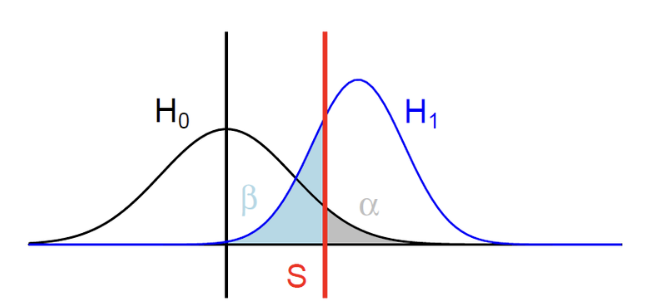

Si l'échantillon reste inchangé, une diminution de α entraîne une augmentation de β et inversement. Autrement dit, si on décide de réduire le nombre de faux positifs, on augmente le nombre de faux négatifs. La seule manière d'améliorer les deux critères est d'augmenter la taille de l'échantillon.

## 1.2. Les étapes du test statistique<a class="anchor" id="1_2"></a>
D’un point de vue pratique, les principales étapes sont :

### Etape 1 : Construire les hypothèses H0 et H1
L’hypothèse nulle Ho correspond à un non-effet de l’expérience. En général cela peut être l’égalité de paramètres statistiques comme la moyenne ou la variance de deux échantillons choisis dans une population. C’est ce que l’on va rejeter ou accepter. 

L’hypothèse alternative H1 est l’hypothèse que l’on cherche à montrer. En général, c’est une l’hypothèse ‘opposé’ ou ‘contraire’ à l’hypothèse nulle. Elle affirme que le paramètre utilisé pour l’hypothèse nulle est soit supérieur, soit inférieur, soit différent. 
### Etape 2 : Déterminer les risques d’erreur alpha, beta
Lors d’un test statistique, il faut bien comprendre qu’on n’est jamais sûr à 100% du résultat. Il y a toujours un risque de se tromper.  

L’erreur de première espèce alpha correspond au risque de rejeter l’hypothèse nulle Ho alors qu’elle est vrai : c’est un « faux positif ». 

L’erreur de deuxième espèce beta correspond au risque d’accepter l’hypothèse nulle alors qu’elle est fausse : c’est un « faux négatif ». 

La fonction puissance est le risque de rejeter Ho alors qu’on doit en effet rejeter Ho.  

Par défaut, on fixe le paramètre alpha à 5% : c’est-à-dire que la probabilité maximale de rejeter HO si elle est vraie est de 5%. 

Pour construire un test, on impose que l’erreur de première espèce soit l’erreur la plus importante à prendre en compte. Ainsi parmi tous les tests dont l’erreur de première espèce est plutôt faible, on choisit ceux dont l’erreur de deuxième espèce est la plus petite possible.
### Etape 3 : Déterminer la situation du test : unilatéral ou bilatéral
Il existe deux grands types de tests : unilatéral ou bilatéral, qui vont dépendre de la définition des hypothèses.  

Un test unilatéral est un test statistique où le paramètre de l’hypothèse alternative sera soit plus petit, soit plus grand qu’une valeur de référence, par exemple si l’on prend les moyennes de deux échantillons A et B, ce sera moyenneA > moyenneB ou moyenneA < moyenneB. 
Un test bilatéral est un test statistique où le paramètre de l’hypothèse alternative sera différent, sans un signe connu (moyenneA ≠ moyenneB ).

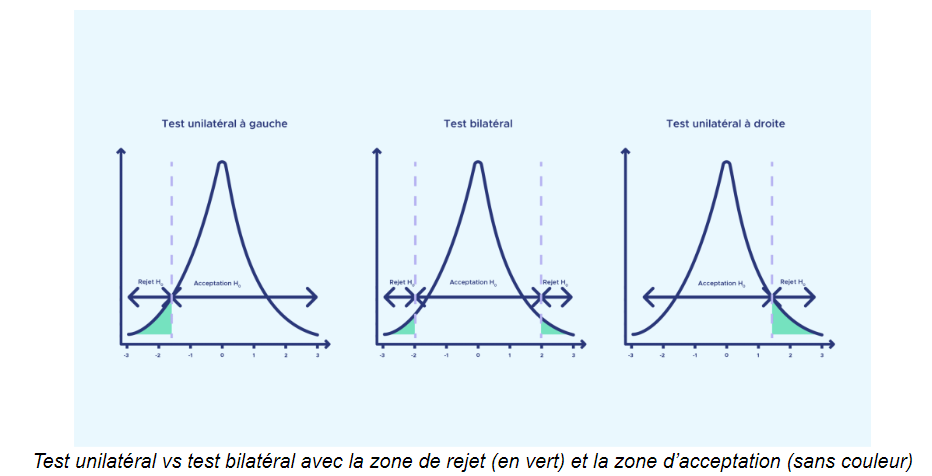
### Etape 4 : Choisir le test adapté : chaque test a ses conditions d’application
C’est une étape très importante, car un mauvais choix de test peut conduire à des erreurs d’interprétation des résultats.  

Il y a plusieurs critères à prendre en compte concernant ce choix notamment : 
- la taille de l’échantillon, 
- l’indépendance entre les groupes, 
- les types de variables : quantitatives/ qualitatives/ catégorielles.

Il existe aussi deux grands types de tests statistiques : les tests paramétriques et non paramétriques.  

Les tests paramétriques sont des tests dont l’échantillon que nous étudions suit une certaine loi (loi normale par exemple) ou vérifie un certain nombre d’hypothèses (même variance entre les deux échantillons donnés). Ils sont plus puissants mais nécessitent un certain nombre d’hypothèses à vérifier. 

Si l’échantillon que nous avons à disposition ne vérifie pas les hypothèses données, alors on applique un test non paramétrique. Ce sont des tests plus robustes et valides dans beaucoup de situations.  

Attention, même si les tests statistiques non paramétriques sont plus robustes et peuvent donc être utilisés dans un plus grand nombre de situations, ils ont quand même des conditions de validité à vérifier.
Cette étape est nécessaire pour ne pas conclure à une hypothèse fausse au final !

### Etape 5 : Calculer la p-value grâce au test et l’interpréter
Après le choix du test et son exécution, on obtient en sortie plusieurs données et notamment la p-value. C’est ce qui va nous permettre de répondre au test. La p-value est le niveau à partir duquel on se met à rejeter Ho.  

- Si p-value < alpha, alors on rejette Ho au niveau alpha,  

- Si p-value > alpha, alors on conserve Ho au niveau alpha. 

Plus la p-value observée est faible, plus on a envie de rejeter Ho car cela veut dire que la valeur de la statistique utilisée pour le test est atypique pour Ho.

Attention ! La p-value n’est pas la probabilité que l’hypothèse de test soit vraie. La p-value indique dans quelle mesure les données sont conformes à l’hypothèse de test et à ses hypothèses.

# 2. Statistiques : analyse univariée<a class="anchor" id="2"></a>

## 2.1. Distribution empirique<a class="anchor" id="2_1"></a>

#### Diagramme en secteur
```
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique
```

#### Diagramme en bâtons ou tuyaux d'orgues
Pour obtenir les fréquences (= proportion), on peut éventuellement ajouter  ``normalize=True``. On obtient donc la distribution empirique. 

Variables qualitatives
```
# Diagramme en tuyaux d'orgues 
# . value_counts(Normalize) compte les valeurs et calcule la fréquence
data["categ"].value_counts(normalize=True).plot(kind='bar') 
plt.show()
```

Variables quantitatives
```
#Variable quart_mois pour avoir une représentation en bâton fin
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

# Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()
```
#### Histogramme

La méthode .hist() regroupe les valeurs en classes : réalise la discrétisation (en anglais : binning, bucketing ou discretization).
=> pour les variables quantitatives continues

##### Le nombre optimal de classes :
Pour l'histogramme, il existe des règles pour déterminer le nombre optimal de classes. Par exemple, la règle de Sturges (1926) considère comme nombre optimal de classes :

$k=[1+log2(n)]$

où $n$ est la taille de l'échantillon.
```
# Histogramme
data["montant"].hist(density=True)# Regroupe les valeurs en class
plt.show()

# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)#Bins définit le nombre de classe
plt.show()
```

#### Sous forme de tableau

- modalité : quart de mois
- effectif : nombre d'occurence de chaque valeur de la modalité
- f : fréquence
- F : fréquence cumulée

```
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
````

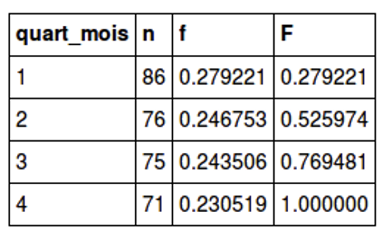

## 2.2. Mesures de tendance centrale<a class="anchor" id="2_2"></a>
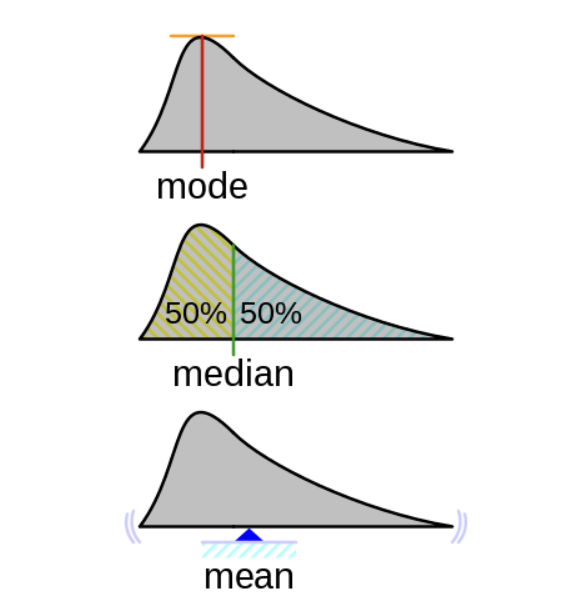

#### Mode
La classe modale est la classe la plus fréquente.
Il arrive que l'on extrapole la définition du mode en l'assimilant au(x) pic(s) d'une distribution. Le mode n’est donc pas obligatoirement unique. Lorsqu’une distribution n’a qu’un seul pic, on parle de distribution unimodale. Il arrive aussi qu’une distribution présente deux ou plusieurs pics : on parle alors de distribution bimodale ou plurimodale.
```
data.mode()
````
#### Médiane
````
data.median()
````
#### Moyenne
````
data.mean()
````

## 2.3. Mesures de dispersion<a class="anchor" id="2_3"></a>
#### Variance empirique
$\nu=\frac{1}{n}\sum\limits _{i=1} ^{n}(x_{i}-\bar x)^2=(\sum\limits _{i=1} ^{n}x_{i}^2)-\bar x^2$
avec $\bar x$ : moyenne des x
````
data['montant'].var()
````

Variance empirique sans biais : $s^{'2}=\frac{n}{n-1}\nu$

````
data['montant'].var(ddof=0)
````

#### Ecart-type empirique, standard deviation
$s=\sqrt\nu$
````
data['montant'].std()
````

#### Coefficient de variation
Un écart-type de 6,55 minutes sur un trajet de 1 h (1h en moyenne), ce n'est pas la même chose qu'un écart-type de 6,55 minutes sur un trajet de 24 h (24h en moyenne)

$CV=\frac{s}{\bar x}$
````
data['montant'].std/data['montant'].mean()
````

## 2.4. Mesures de forme<a class="anchor" id="2_4"></a>

L'étude de l'asymétrie d'une distribution, c'est chercher qui de la médiane ou de la moyenne est la plus grande. 

Une distribution est dite symétrique si elle présente la même forme de part et d’autre du centre de la distribution. Dans ce cas : $Mode=Med=\bar x$ .

Une distribution est étalée à droite (ou oblique à gauche, ou présentant une asymétrie positive) si : $Mode<Med<\bar x$ . 

De même, elle est étalée à gauche (ou oblique à droite) si $Mode>Med>\bar x$ .

#### Skewness empirique : symétrie

$$\gamma_{1}=\frac{\mu^3}{s^3}$$

avec $\mu^3=\frac{1}{n}\sum\limits _{i=1} ^{n}(x_{i}-\bar x)^3$


```
data['montant'].skew()
````

- Si γ1=0 alors la distribution est symétrique.
- Si γ1>0 alors la distribution est étalée à droite.
- Si γ1<0 alors la distribution est étalée à gauche.

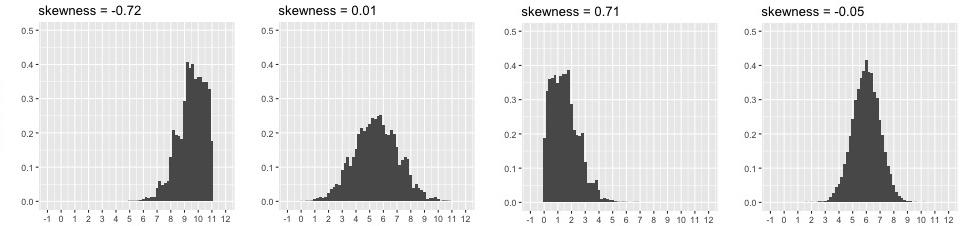

#### Kurtosis empirique : applatissement

$$\gamma_{2}=\frac{\mu^4}{s^4}-3$$

avec $\mu^4=\frac{1}{n}\sum\limits _{i=1} ^{n}(x_{i}-\bar x)^4$

````
data['montant'].kurtosis()
````
- Si γ2=0 , alors la distribution a le même aplatissement que la distribution normale.
- Si γ2>0 , alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.
- Si γ2<0 , alors les observations sont moins concentrées : la distribution est plus aplatie.
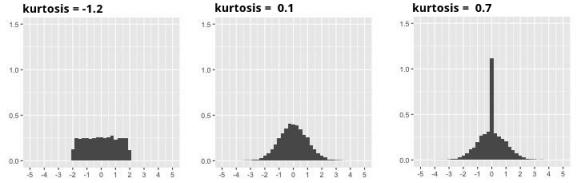

## 2.5. Mesures de concentration<a class="anchor" id="2_5"></a>

#### Courbe de Lorenz
La courbe de Lorenz permet de représenter la répartition d'une variable au sein d'une population, notamment si elle est égalitaire ou non.

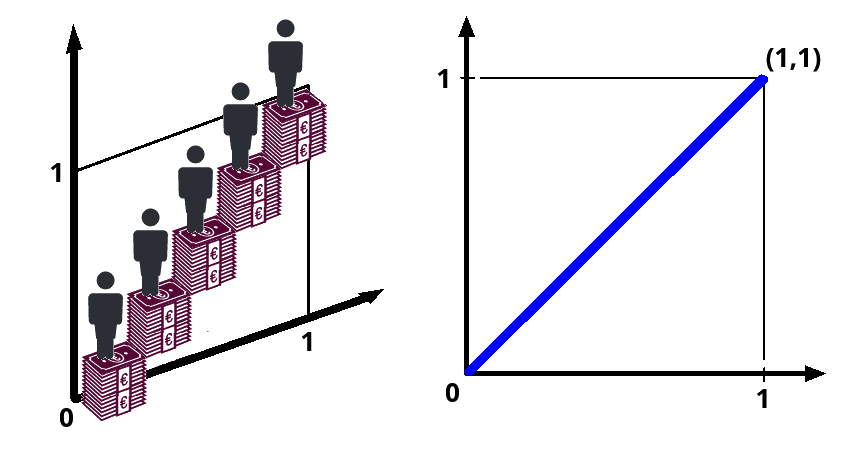
On y sélectionne tout d'abord le sous-échantillon de travail que l'on appelle  ``depenses``  . Il faut trier les individus dans l'ordre croissant des valeurs de la variable ; nous le faisons ici grâce à  ``np.sort(dep)``  , car  dep  contient les observations de la variable montant.

Ensuite, nous calculons la somme cumulée grâce à  ``np.cumsum()``  . Pour normaliser et faire en sorte que le haut de la courbe soit à 1, on divise le tout par  ``dep.sum()``  . La variable  ``lorenz``  contient les ordonnées des points, mais il nous faut maintenant leurs abscisses : celles-ci s'étendent de 0 à 1 (comme évoqué précédemment) à intervalle réguliers. C'est ce que produit  ``np.linspace(0-1/n,1+1/n,len(lorenz))``
````
depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.show()
````

#### Indice de Gini



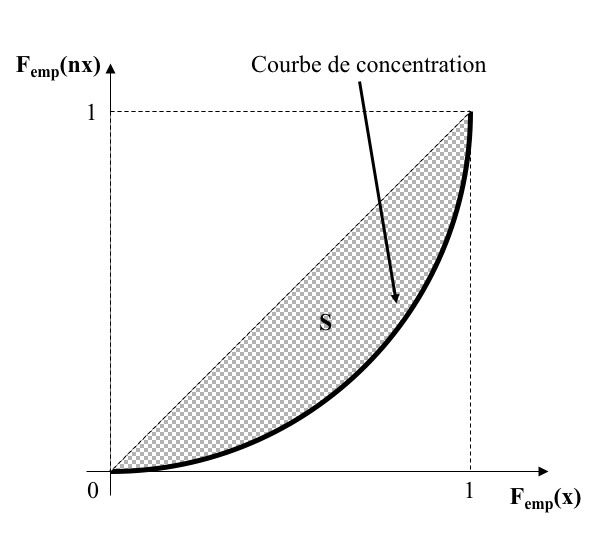

$Gini = 2xS$
avec $S$ : aire présente entre la première bissectrice et la courbe de Lorenz

Plus la distribution du revenu est concentrée, plus la fraction la plus riche de la population reçoit une grande partie des revenus, et plus la fraction la plus pauvre reçoit une petite partie des revenus. À l'inverse, dans une distribution du revenu parfaitement égalitaire, 10 % de la population reçoit exactement 10 % des revenus totaux.

````
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini
````

# 3. Statistiques : analyse bivariée<a class="anchor" id="3"></a>

Références :
- [https://pingouin-stats.org/guidelines.html](https://pingouin-stats.org/guidelines.html)
- [https://datascientest.com/5-etapes-pour-faire-un-test-statistique](https://datascientest.com/5-etapes-pour-faire-un-test-statistique)

## 3.1. Tests de normalité<a class="anchor" id="3_1"></a>

*Références :*
- [Tests de normalité dans Python](https://medium.com/analytics-vidhya/normality-test-with-python-in-data-science-5abbefc81fd0)
- [Moonbooks](https://fr.moonbooks.org/Articles/Introduction-aux-tests-de-normalit%C3%A9-statistiques-avec-Python/)
- [towardsdatascience.com/normality-tests-in-python](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411)
- [biostat-Normalite](http://www.biostat.ulg.ac.be/pages/Site_r/Normalite.html)

Lorsque la taille des échantillons est suffisamment grande (n >30), on peut ignorer le test de normalité sans problème majeur.

Le théorème central limite nous dit que, la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). ([source](http://www.sthda.com/french/wiki/test-de-student-est-il-toujours-correct-de-comparer-des-moyennes))


#### Test de Shapiro-Wilk  - Avec Scipy.stats
````
stat,p = st.shapiro(data)
print('stat = %.3f,p=%.3f \n'% (stat,p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis,data comes from a normal distribution, can be rejected ")
else:
    print("The null hypothesis,data comes from a normal distribution, cannot be rejected")
````

#### K squared D'Agostino - Avec Scipy.stats
````
k2, p = st.normaltest(df_B2C["panier_moyen"])
alpha = 1e-3
print("p = ",p)

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis,data comes from a normal distribution, can be rejected ")
else:
    print("The null hypothesis,data comes from a normal distribution, cannot be rejected")
````

#### Représentation distribution normale

````
import scipy.stats as st

# Courbe loi normale
X=df_B2C.freq_achat

x_min = 0.0
x_max = max(X)

mean = X.mean()
std = X.std()

x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x,mean,std)

plt.plot(x,y, color='blue',label='Distribution normale')


# diagramme de densité de la variable
sns.kdeplot(X, color='indianred',fill=True,label='Fréquence achat')

plt.xlabel('Fréquence achat')
plt.ylabel('Densité')
plt.title('Freq_achat : comparaison avec une distribution normale',fontsize=10)
plt.legend()
plt.show()
````

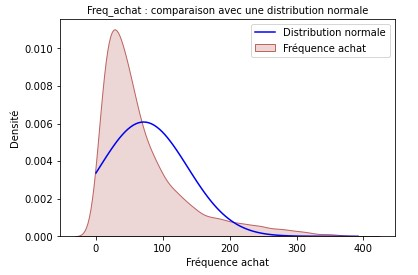

##### Normaliser les données
[Source](https://datadesignfrench.github.io/Transformations-French.html)
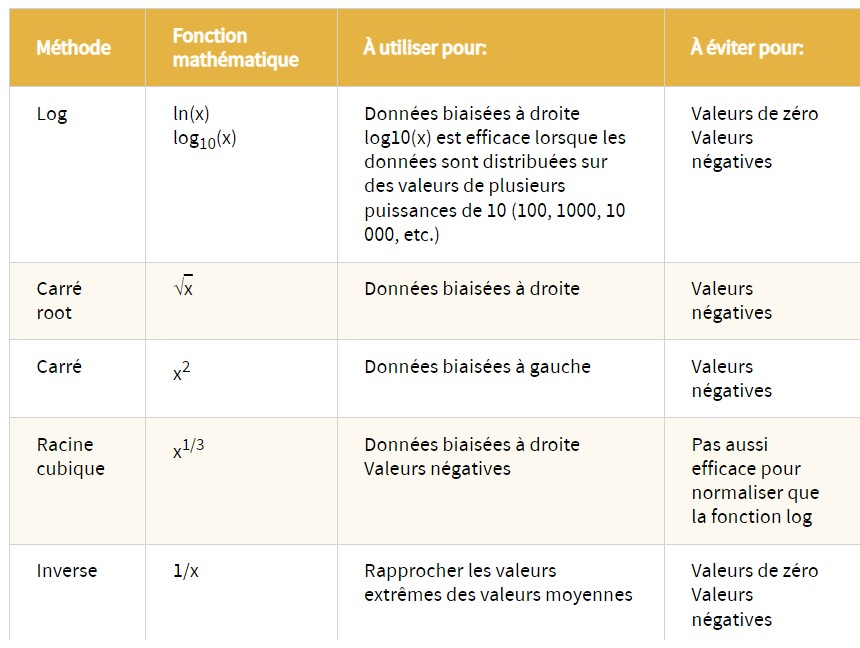



## 3.2. Analyse bivariée entre 2 variables quantitatives<a class="anchor" id="3_2"></a>

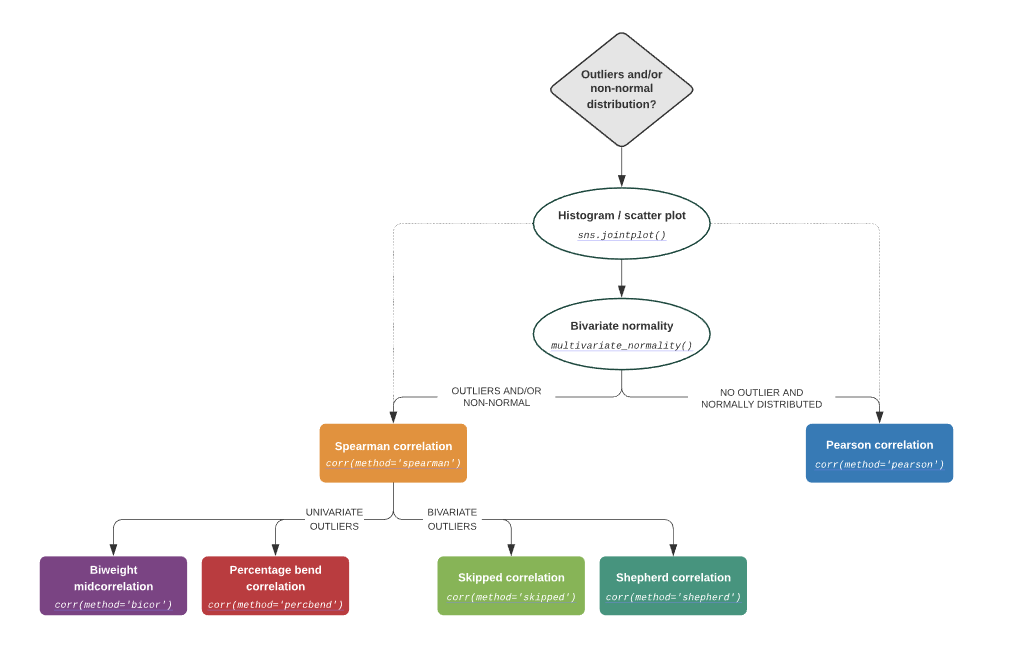

### 3.2.1. Représentation graphique : Discrétisation et boxplots<a class="anchor" id="3_2_1"></a>
```
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()
```
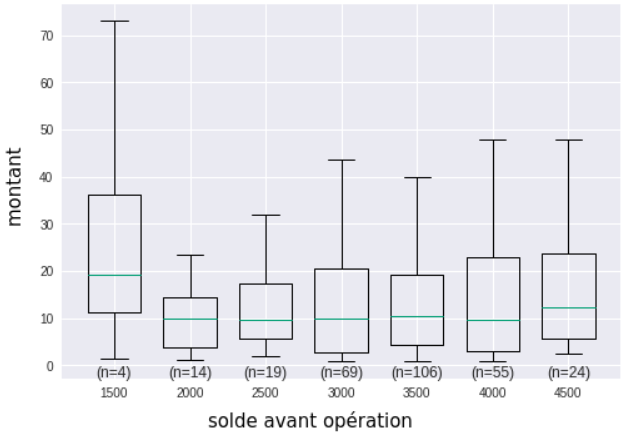

````
import seaborn as sns
import matplotlib.pyplot as plt

data['cat'] = 0
data.loc[data['Age'] <= 30, 'cat'] = '- 30'
data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'cat'] = '30-40'
data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'cat'] = '40-50'
data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'cat'] = '50-60'
data.loc[(data['Age'] > 60), 'cat'] = '60+'

sns.boxplot(y='Position', x='cat', data=dt, orient='v')
plt.show()
````

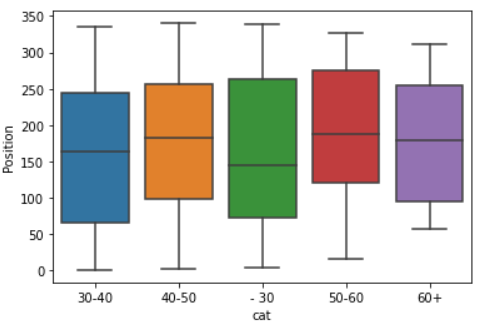

### 3.2.2 Coefficient de corrélation linéaire de Pearson (test paramétrique)<a class="anchor" id="3_2_2"></a>

#### Covariance empirique

$$s_{X,Y}=\frac{1}{n}\sum\limits _{i=1} ^{n}(x_{i}-\bar x)(y_{i}-\bar y)$$

- Si x est petit quand y est petit (et inversement), alors $s_{X,Y}$ sera positif. 
- Si X et Y ne sont au contraire pas corrélés, $s_{X,Y}$ sera plutôt proche de 0. 
- Pour les motivés, vous pouvez aussi déduire que si x est grand quand y est petit (et inversement), alors $s_{X,Y}$ sera négatif. Dans ce dernier cas, il y a corrélation certes, mais on dit que c'est une corrélation négative.

Deux propriétés de la covariance empirique :

- $s_{X,Y}=s_{Y,X}$ . C'est la propriété de symétrie.
- Si on crée une nouvelle variable Z à partir de 2 variables U et V dont on connaît la covariance empirique, et que $Z=aU+bV$ , alors $s_{X,Z}=as_{X,U}+bs_{X,V}$ . C'est la propriété de bilinéarité.

````
import scipy.stats as st
import numpy as np

print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])
````

La méthode  `np.cov`  renvoie la matrice de covariance, que vous n'avez pas à connaître à ce niveau. Cette matrice est en fait un tableau, et dans ce dernier, c'est la valeur située sur la 2e ligne à la 1e colonne, d'où le  `[1,0]`.


#### Coefficient de Pearson
Pour ramener la covariance empirique à une valeur qui soit comprise entre -1 et 1, alors on peut la diviser par le produit des écarts-types. Cette normalisation nous permet de faire des comparaisons.

$$r_{X,Y}=\frac{s_{X,Y}}{s_{X}s_{Y}}$$

````
import scipy.stats as st
import numpy as np

print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])
````

Un couple de valeurs est renvoyé, le coefficient de corrélation est la premier élément de ce couple, d'où le `[0]`  à la fin.


- Sur le graphique ci-dessous, les deux schémas du haut montrent des points bien alignés : leur r est donc proche de 1 ou de -1. - Sur le 4e graphique en revanche, il n'y a pas vraiment de corrélation (connaître la valeur du x d'un point ne nous donne aucune indication sur la valeur de y ) : r est donc proche de 0. 
- Cependant sur le 3e graphique, il y a une forte corrélation, mais sa forme n'est pas linéaire, et r est donc malheureusement proche de 0.
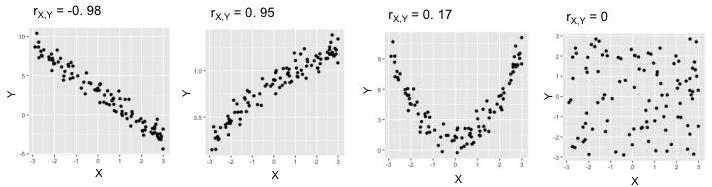

#### Conditions d'applications

En principe, le coefficient de Pearson n'est applicable que pour mesurer la relation entre deux variables X et Y ayant une distribution de type gaussien et ne comportant pas de valeur exceptionnelles. Si ces conditions ne sont pas vérifiées (cas fréquent ...) l'emploi de ce coefficient peut aboutir à des conclusions erronées sur la présence ou l'absence d'une relation.

On notera également que l'absence d'une relation linéaire ne signifie pas l'absence de toute relation entre les deux caractères étudiés.

[Source](http://grasland.script.univ-paris-diderot.fr/STAT98/stat98_6/stat98_6.htm)

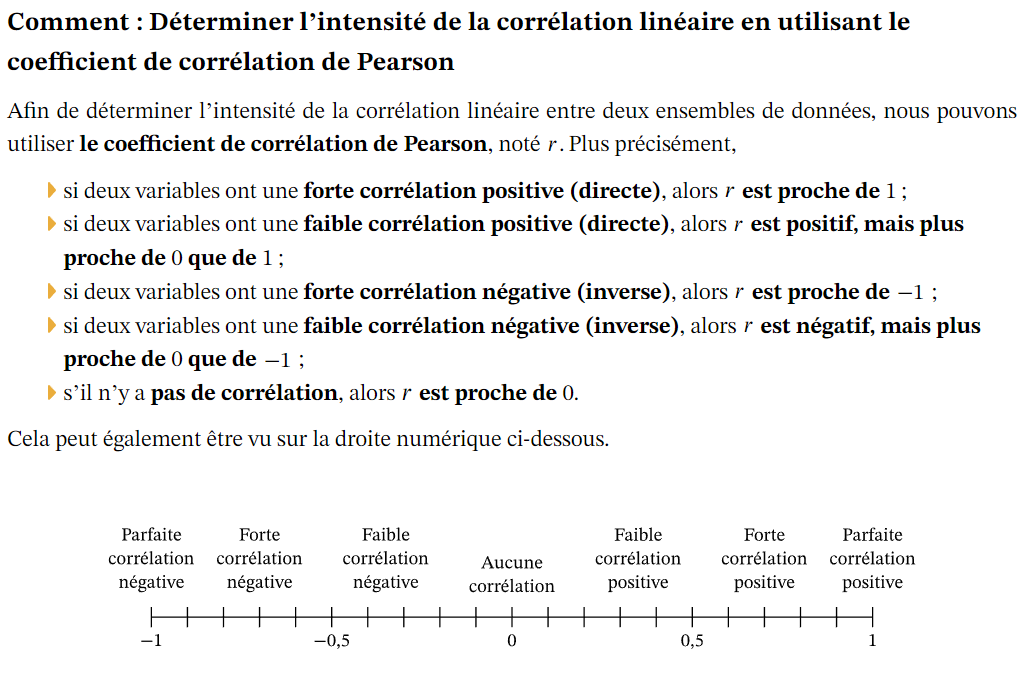

[Source](https://www.nagwa.com/fr/explainers/143190760373/)

### 3.2.3 Coefficient de rang de Spearman (Spearman's rho) (test non paramétrique)<a class="anchor" id="3_2_3"></a>

Références :
- [https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)
- https://www.youtube.com/watch?v=Do5LnZKZROA

> The Spearman rank-order correlation is a statistical procedure that is designed to measure the relationship between two variables on an ordinal scale of measurement.

````
# Calcul du coefficient de corrélation de rang de Spearman
coeff, pvalue = st.spearmanr(df_B2C["age"],df_B2C["montant_total_achat"])
print("Le coefficient de corrélation de rang de Spearman est égal à :",coeff)
alpha = 1e-3
print("p-value = ",p)

if p < alpha:  # H0 : pas de corrélation entre les 2 variables
    print("H0 est rejettée : il existe une corrélation entre les 2 variables.")
else:
    print("H0 est acceptée : il n'existe pas de corrélation entre les 2 variables.")
````

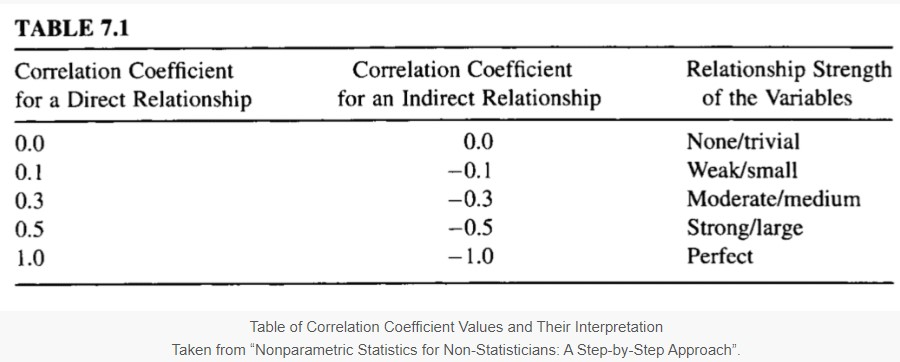

### 3.2.4 Matrice de corrélation - heatmap<a class="anchor" id="3_2_4"></a>

````
# Calcul du coeffiecient de corrélation de rang de Spearman et représentation sous forme de heatmap
data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Reds'))
````
ou

````
# Calcul du coeffiecient de corrélation de Pearson et représentation sous forme de heatmap
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Reds'))
````
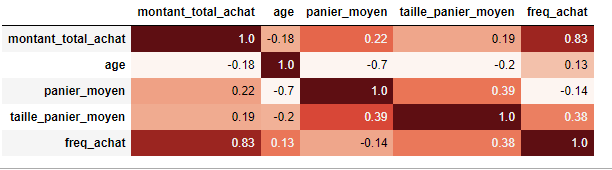

source : [https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

````
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
````
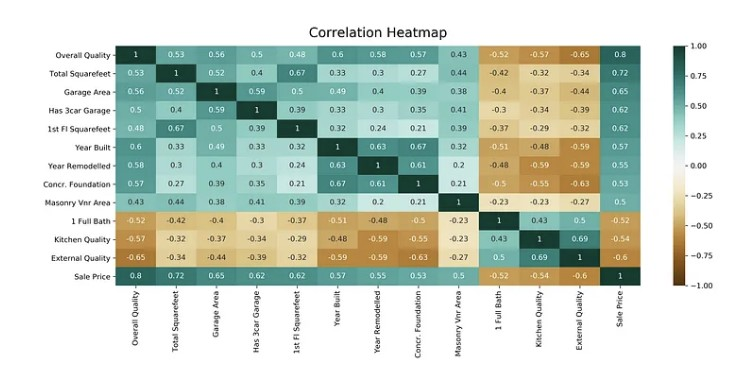


## 3.3. Analyse bivariée entre une variable quantitative et une variable qualitative<a class="anchor" id="3_3"></a>

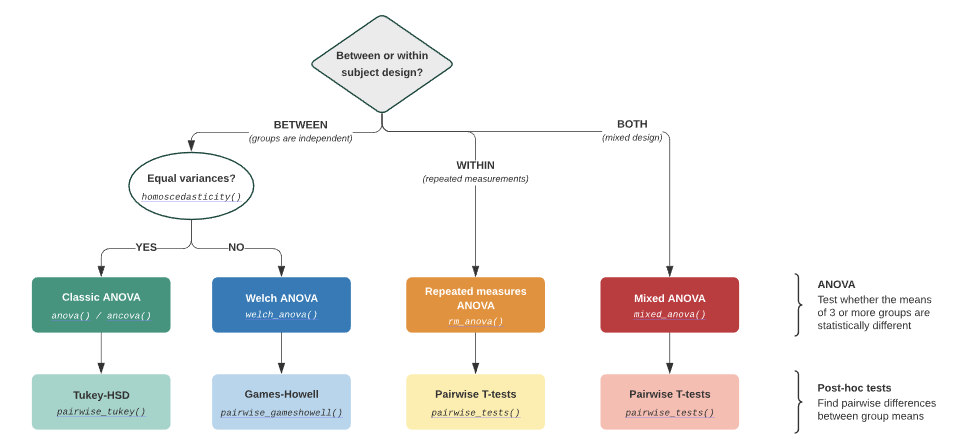

### 3.3.1 Représentation graphique<a class="anchor" id="3_3_1"></a>
````
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

# Affichage du graphique
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
````
Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.

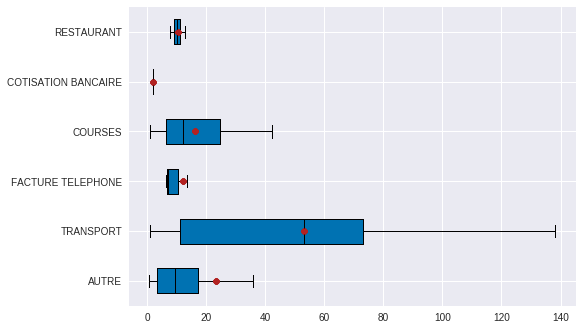

### 3.3.2 Test de l'égalité des variances <a class="anchor" id="3_3_2"></a>

````
# Ìn case of a between subject design, so the first step is to test for equality of variances
pg.homoscedasticity(data=df, dv='Pain threshold', group='Hair color')
````

### 3.3.3 Méthode ANOVA : analyse de la variance (test paramétrique) <a class="anchor" id="3_3_3"></a>

Références :
- [https://statsandr.com/blog/anova-in-r/](https://statsandr.com/blog/anova-in-r/)

#### 3.3.3.1 Classic ANOVA<a class="anchor" id="3_3_3_1"></a>

$$Y=\alpha_{i} + \mu + \epsilon$$

avec $\mu$ : valeur de référence en commun, $\alpha_{i}$ : ajustement de la variable qualitative $i$, la somme des $\alpha_{i}$=0, et $\epsilon$ : l'erreur

$\mu=\hat{\mu}$ moyenne des montants

Pour une catégorie i , $\alpha_{i} = \bar{y_{i}} - \hat{\mu}$ avec $\bar{y_{i}}$ la moyenne des montants de la catégorie $i$ 

##### Rapport de corrélation $\eta^2$ (eta squarred)

$$\eta_{X,Y}^2=\frac{V_{interclasse}}{V_{totale}}$$

-  Si $\eta_{X,Y}^2$=0  , cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre les variables $Y$ et $X$. 
- Si $\eta_{X,Y}^2$=1 , cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc à priori une relation entre les variables $Y$ et $X$.

````
X = "categ" # qualitative
Y = "montant" # quantitative

sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])
````

##### Variations SCT, SCE, SCR
- Variation totale SCT
$$SCT =\sum\limits _{i=1} ^{k}\sum\limits _{j=1} ^{n_i}(y_{j}-\bar y)^2$$
- Variation interclasse SCE
$$SCE=\sum\limits _{i=1} ^{k}n_{i}(\bar{y_{i}}-\bar y)^2$$
- variation intraclasse SCR
$$SCR= \sum\limits _{i=1} ^{k}\sum\limits _{j=1} ^{n_i}(y_{ij}-\hat y_{j})^2=\sum\limits _{i=1} ^{k}n_{i}s_{i}^2$$
avec $s_{i}^2$ variance au sein de la classe i


#### 3.3.3.2 Welch-ANOVA (test paramétrique)<a class="anchor" id="3_3_3_2"></a>

````
pip install pingouin

import pingouin as pg

# test Welch-ANOVA
pg.welch_anova(data=df_client_B2C, dv='taille_panier_moyen', between='groupe_age')
````

##### Test post-hoc Games-Howell

Un test par paires de Games-Howell permet de comparer les moyennes paire par paire.


`````
# Test par paires de Games-Howell
pg.pairwise_gameshowell(data=df_client_B2C, dv='taille_panier_moyen', between='groupe_age')
``````

### 3.3.4  Tests non paramétriques <a class="anchor" id="3_3_4"></a>

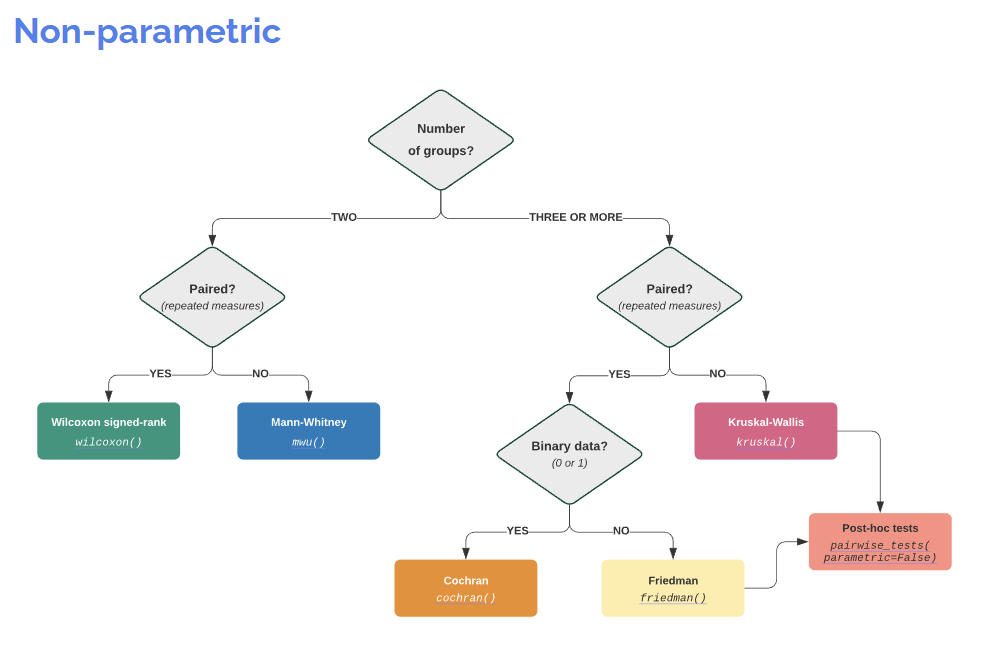

#### 3.3.4.1 Méthode Kruskal-wallis H test<a class="anchor" id="3_3_4_1"></a>

Références : 
- [Python - Kruskal-Wallis H test](https://www.youtube.com/watch?v=Af1YuaFylqM)
- [Scipy.stats.kruskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)
- [Wikipedia: Test_de_Kruskal-Wallis](https://fr.wikipedia.org/wiki/Test_de_Kruskal-Wallis)


##### Scipy.stats
````
import scipy.stats as st

# Création des groupes de valeurs à tester : un par catégorie de livres
cat_0=df_B2C.loc[df_B2C['categ']==0.0,'age']
cat_1=df_B2C.loc[df_B2C['categ']==1.0,'age']
cat_2=df_B2C.loc[df_B2C['categ']==2.0,'age']

# Utilisation de la méthode Kruskal de Scipy.stats
stat,pvalue=st.kruskal(cat_0,cat_1,cat_2)
print("H =",stat)
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : la médiane est la même pour tous les groupes
    print("H0 est rejettée : la médiane n'est pas la même pour tous les groupes.")
else:
    print("H0 est acceptée : la médiane est la même pour tous les groupes.")

````

##### Pingouin
````
import pingouin as pg

# Test de Kruskal-Wallis entre les variables âge et taille_panier_moyen 
pg.kruskal(data=df_client_B2C, dv='taille_panier_moyen', between='groupe_age')
````

## 3.4 Analyse bivariée entre variables qualitatives <a class="anchor" id="3_4"></a>

### 3.4.1 Tableau des contingence<a class="anchor" id="3_4_1"></a>

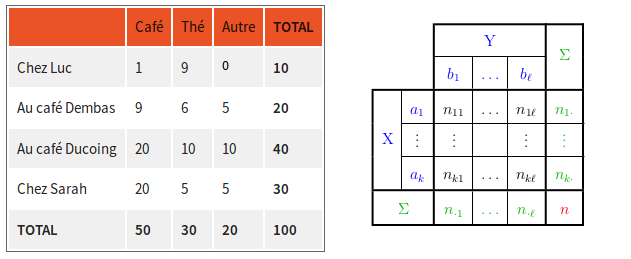
- Chacune des valeurs du tableau de contingence *(hors colonnes TOTAL)* est appelée **effectif conjoint nij**.
- L'ensemble effectifs conjoints est appelé **distribution conjointe empirique** de *(nom café, boisson préférée)*.
- La dernière ligne *(TOTAL)* est appelée **distribution marginale empirique** de boisson préférée, et la dernière colonne *(TOTAL)* est appelée **distribution marginale empirique** de *nom café*.
- L'ensemble des effectifs conjoints de la première ligne *(Chez Luc)* est appelé **distribution conditionnelle empirique** de boisson préférée étant donné que nom café = Chez Luc.

````
Exemple code d'un tableau de contingence :

X = "quart_mois"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont
````


##### Autre exemple
````
# Création du tableau de contingences
X = "quart_mois"
Y = "categ"

#aggfunc=len compte le nombre d'individus
cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
````

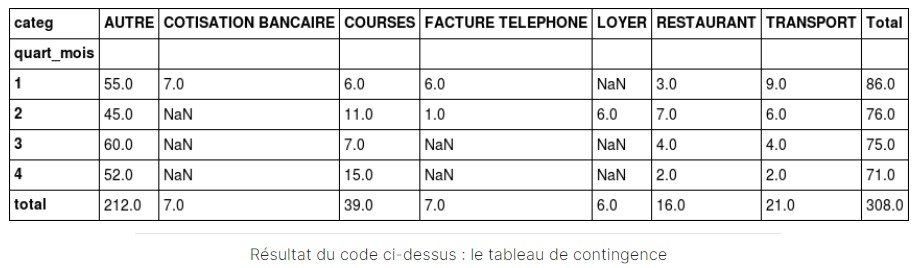

### 3.4.2 Heatmap des écarts au carré normalisés <a class="anchor" id="3_4_2"></a>

#### Ecarts au carré normalisé de la valeur attendue vs valeur observée:

$$\xi_{ij}=\frac{(n_{ij}-\frac{n_{i}.n_{j}}{n})^2}{\frac{n_{i}.n_{j}}{n}}$$

Normalement, on applique à cette mesure un seuil au-delà duquel on dira que les 2 variables sont corrélées. Plus ξn est grand, moins l'hypothèse d'indépendance est valide.

=> Le test avec le seuil s'appelle le test du $\chi^2$ d'indépendance (prononcer "ki-2"), parfois écrit chi-2 ou khi-2.
````
# Création de la heatmap
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
````

Les lignes 1 à 6 calculent le tableau  `indep`, qui est le tableau représentant le cas d'indépendance. Il fait intervenir le produit matriciel (avec  `.dot()`).

En ligne 9,  measure  contient tous les $\xi_{ij}$ pour chaque case du tableau. On peut ensuite calculer les contributions (que nous avons définies plus haut) en divisant chaque $\xi_{ij}$ par $ξ_n$ (placé dans la variable `xi_n`). On fait ceci en ligne 11 par  `measure/xi_n`. On obtient ainsi pour chaque case une valeur comprise entre 0 et 1, qui nous sert à étalonner la couleur.

On peut considérer cette valeur comme une contribution à la non-indépendance. Elle est optionnellement exprimable en pourcentage si on la multiplie par 100. Plus cette contribution sera proche de 100 %, plus la case en question sera source de non-indépendance. La somme de toutes les contributions vaut 100 %.

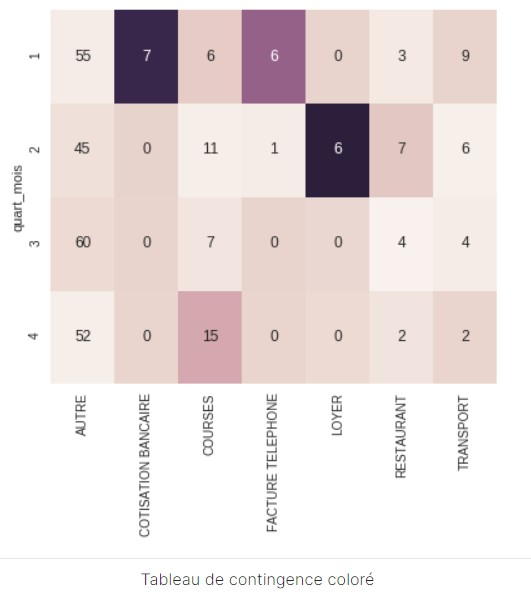

### 3.4.3 Test du $\chi^2$ d'indépendance (chi-2 ou khi-2) <a class="anchor" id="3_4_3"></a>

Sources : 
- [https://cheb.ro/public/stat/Polycopie_Khi-deux.pdf](https://cheb.ro/public/stat/Polycopie_Khi-deux.pdf)
- [https://www.soft-concept.com/surveymag/test-independance-khi-2.html](https://www.soft-concept.com/surveymag/test-independance-khi-2.html)
- [https://www.deschamps.io/236-realiser-un-test-dindependance-chi2-en-python-avec-scipy-stats](https://www.deschamps.io/236-realiser-un-test-dindependance-chi2-en-python-avec-scipy-stats)
- [https://www.jmp.com/fr_fr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html](https://www.jmp.com/fr_fr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html)
- [https://www.pythonfordatascience.org/chi-square-test-of-independence-python/#researchpy](https://www.pythonfordatascience.org/chi-square-test-of-independence-python/#researchpy)

Pour deux variables qualitatives, le test du chi-2 d'indépendance s'applique pour vérifier l'indépendance des 2 variables.

Nous considérons pour ce test :
- H0 : Les variables sont indépendantes.
- H1 : Les variables sont dépendantes.

Les conditions pour appliquer un test du chi-2 sont :
- 2 variables qualitatives, collectées de manière indépendantes
- aucune valeur attendue n'est égale à 0
- pour 80% des combinaisons des 2 variables, les valeurs observées et attendues sont supérieures à 5.

Pour un niveau de confiance de xx%, la région critique conduisant au rejet de H0 pour une loi du $\chi^2$ à k degrés de liberté, la région critique conduisant au rejet de l'hypothèse H0 est de [x ; +$\infty$[.
=> se référer à la table du $\chi^2$

La p-value donne la probabilité de validation de H0 - la probabilité de ne voir aucun lien entre les critères. Plus p-value est petite, plus il y a un lien entre les critères (et donc pas d'indépendance).

##### scipy.stats
````
import scipy.stats as st

chi2, pvalue, dof, expected = st.chi2_contingency(cont)
print("Le degré de liberté est de",dof)
print("Chi-2 =",chi2)
print("p-value =",pvalue)

seuil = 0.001
if pvalue < seuil:
    print("H0 est rejetée : les variables ne sont pas indépendantes.")
else:
    print("H0 est vérifiée : les variables sont indépendantes.")
````

##### researchpy : chi-2 et V de Cramer
````
pip install researchpy

import researchpy as rp

# test du chi-2 et V de Cramer avec researchpy 
crosstab, test_results, expected = rp.crosstab(df_B2C["categ"], df_B2C["groupe_age"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
````

### 3.4.4 Test du V de Cramer <a class="anchor" id="3_4_4"></a>

Traditionnellement, pour établir s’il existe un effet entre les deux variables qualitatives croisées dans un tableau de contigence, on utilise le test du $\chi^2$. Le test V de Cramer permet de comparer l’intensité du lien entre les deux variables étudiées.

$V=\sqrt{\frac{\chi^2}{\chi_{max} ^2}}$

Plus V est proche de zéro, moins les variables étudiées sont dépendantes. Au contraire, donc, il vaudra 1 lorsque les deux variables sont complètement dépendantes, puisque le $\chi^2$ est alors égal au $\chi^2$ max (dans un tableau 2 × 2, il prend une valeur comprise entre -1 et 1). Donc, plus V est proche de 1, plus la liaison entre les deux variables étudiées est forte.

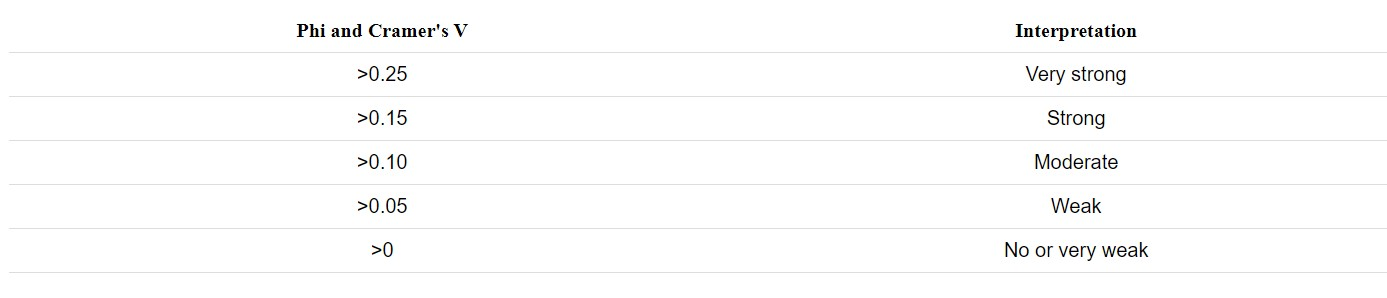

##### Pour aller plus loin 
* [L’interprétation des tests d’hypothèses : p, la taille de l’effet et la puissance](https://www.erudit.org/fr/revues/rse/2009-v35-n1-rse2955/029931ar/)